In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [32]:
df = pd.read_csv('BreastCancerWc.csv', header = None)

In [33]:
df.columns = [
    'SampleCodeNumber',
    'ClumpThickness',
    'UniformityCellSize',
    'UniformityCellShape',
    'MarginalAdhesion',
    'SingleEpithelialCellSize',
    'BareNuclei',
    'BlandChromatin',
    'NormalNucleoli',
    'Mitoses',
    'Class'
]

In [34]:
df.head()

,SampleCodeNumber,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [35]:
df.dtypes

SampleCodeNumber             int64
ClumpThickness               int64
UniformityCellSize           int64
UniformityCellShape          int64
MarginalAdhesion             int64
SingleEpithelialCellSize     int64
BareNuclei                  object
BlandChromatin               int64
NormalNucleoli               int64
Mitoses                      int64
Class                        int64
dtype: object

In [36]:
df.isnull().sum()

SampleCodeNumber            0
ClumpThickness              0
UniformityCellSize          0
UniformityCellShape         0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
BlandChromatin              0
NormalNucleoli              0
Mitoses                     0
Class                       0
dtype: int64

In [37]:
for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)

Unique values in 'SampleCodeNumber':
[ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  1170419
  1170420  117

In [38]:
for col in df.columns:
    if df[col].astype(str).str.contains(r"\?").any():
        print(f"Column '{col}' contains '?' values.")

Column 'BareNuclei' contains '?' values.


In [39]:
df['BareNuclei'] = pd.to_numeric(df['BareNuclei'], errors='coerce')

In [40]:
df.isnull().sum()

SampleCodeNumber             0
ClumpThickness               0
UniformityCellSize           0
UniformityCellShape          0
MarginalAdhesion             0
SingleEpithelialCellSize     0
BareNuclei                  16
BlandChromatin               0
NormalNucleoli               0
Mitoses                      0
Class                        0
dtype: int64

In [41]:
df.dropna(inplace=True)

In [42]:
df = df[df.select_dtypes(include=[np.number]).ge(0).all(axis=1)]

In [43]:
df.drop(columns=['SampleCodeNumber'], inplace=True)

In [44]:
def detect_outliers(df, columns=None):
    # If no columns are specified, use all numeric columns except the last column (class column)
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns
    
    # Calculate Q1, Q3, and IQR for each column
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a DataFrame indicating whether each value is an outlier
    outliers = (df[columns] < lower_bound) | (df[columns] > upper_bound)
    
    return outliers

In [45]:
outliers = detect_outliers(df)

In [46]:
df = df[~outliers.any(axis=1)] 

In [47]:
# Check the class distribution in the entire dataset
print(df['Class'].value_counts())

Class
2    427
4     64
Name: count, dtype: int64


In [48]:
# Map the values to 0 and 1
df['Class'] = df['Class'].replace({2: 0, 4: 1})

# Check the class distribution
print(df['Class'].value_counts())

Class
0    427
1     64
Name: count, dtype: int64


In [49]:
X = df.drop(columns=['Class'])
y = df['Class'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [51]:
print(y_train.value_counts())

Class
0    335
1     57
Name: count, dtype: int64


In [52]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [53]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9696969696969697
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        92
           1       0.83      0.71      0.77         7

    accuracy                           0.97        99
   macro avg       0.91      0.85      0.88        99
weighted avg       0.97      0.97      0.97        99



In [54]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [56]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9494949494949495
Naive Bayes Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        92
           1       0.58      1.00      0.74         7

    accuracy                           0.95        99
   macro avg       0.79      0.97      0.85        99
weighted avg       0.97      0.95      0.96        99



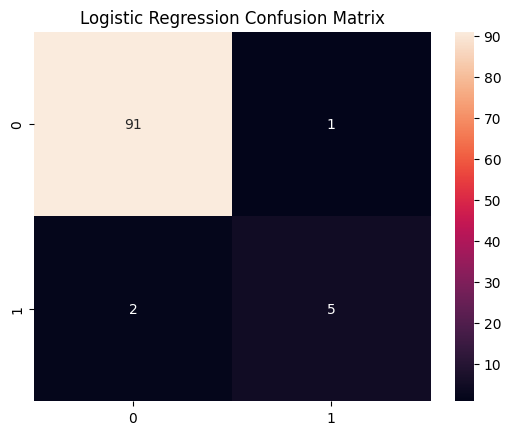

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

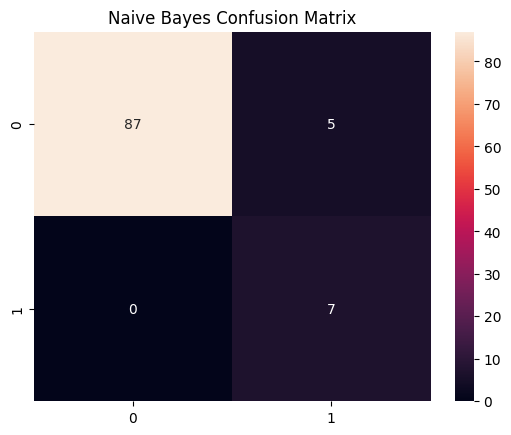

In [58]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d')
plt.title("Naive Bayes Confusion Matrix")
plt.show()